# Load in Boston housing data set and train NGBoost model

In [1]:
from ngboost import NGBRegressor

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

X, Y = load_boston(True)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

ngb = NGBRegressor().fit(X_train, Y_train)
Y_preds = ngb.predict(X_test)
Y_dists = ngb.pred_dist(X_test)

# test Mean Squared Error
test_MSE = mean_squared_error(Y_preds, Y_test)
print('Test MSE', test_MSE)

# test Negative Log Likelihood
test_NLL = -Y_dists.logpdf(Y_test.flatten()).mean()
print('Test NLL', test_NLL)

[iter 0] loss=3.6325 val_loss=0.0000 scale=0.5000 norm=3.3001
[iter 100] loss=3.0695 val_loss=0.0000 scale=1.0000 norm=3.7127
[iter 200] loss=2.4070 val_loss=0.0000 scale=2.0000 norm=3.9266
[iter 300] loss=1.9717 val_loss=0.0000 scale=2.0000 norm=3.0646
[iter 400] loss=1.8004 val_loss=0.0000 scale=2.0000 norm=2.7752
Test MSE 8.363064542252776
Test NLL 3.2037643936784685


# Feature importance for each parameter

In [2]:
## Feature importance for loc trees
feature_importance_loc = ngb.feature_importances_[0]
feature_importance_loc

array([0.06204892, 0.00271903, 0.03039769, 0.00653581, 0.06556052,
       0.22765842, 0.07073901, 0.16359776, 0.02429042, 0.06009002,
       0.04504398, 0.07386496, 0.16745346])

In [3]:
## Feature importance for scale trees
feature_importance_scale = ngb.feature_importances_[1]
feature_importance_scale

array([0.05533279, 0.0037352 , 0.03391734, 0.00438272, 0.08631244,
       0.21400223, 0.1083932 , 0.11264647, 0.02646989, 0.09258242,
       0.02987915, 0.08827671, 0.14406943])

Text(0.5, 1.0, 'scale param')

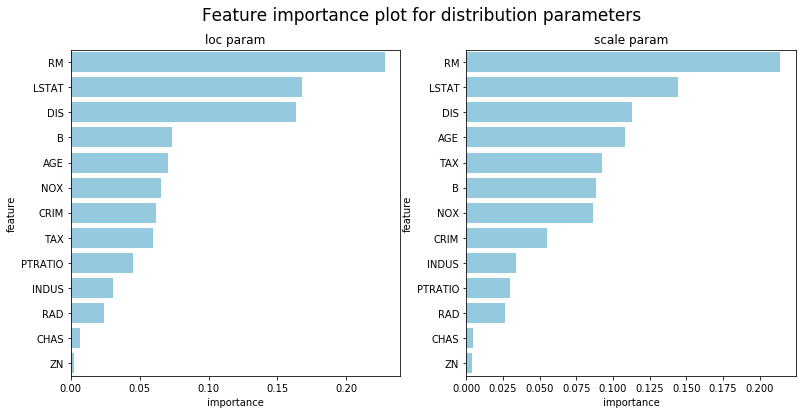

In [4]:
df_loc = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_loc})\
    .sort_values('importance',ascending=False)
df_scale = pd.DataFrame({'feature':load_boston()['feature_names'], 
                       'importance':feature_importance_scale})\
    .sort_values('importance',ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(13,6))
fig.suptitle("Feature importance plot for distribution parameters", fontsize=17)
sns.barplot(x='importance',y='feature',ax=ax1,data=df_loc, color="skyblue").set_title('loc param')
sns.barplot(x='importance',y='feature',ax=ax2,data=df_scale, color="skyblue").set_title('scale param')